In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [12]:
data_pdf = pd.read_csv("signals.csv")

In [13]:
drop_list = [c for c in data_pdf.columns if c.startswith('quality')]
drop_list.remove('quality_parameter_13')
t = list(range(6, 12))+list(range(108, 114))+list(range(18, 36))
t = ['input_parameter_'+str(i).zfill(3) for i in t]
drop_list+=t
data_pdf.drop(drop_list, axis=1, inplace=True)

In [14]:
len(data_pdf[data_pdf["QUALITY_STATUS"] == 1])

815

In [15]:
len(data_pdf[data_pdf["QUALITY_STATUS"] == 0])

166

##### Pre-processing

In [16]:
### Convert captial columns names to lower case
data_col_list = data_pdf.columns
new_list = []
for itr,col in enumerate(data_col_list):
    new_list.append(col.lower())
    
data_pdf.columns = new_list  
data_pdf = data_pdf.dropna()

In [17]:
data_pdf.drop(["quality_status"], axis=1, inplace=True)

In [18]:
X=data_pdf[list([col for col in data_pdf.columns if col != "quality_parameter_13"])]  # Features
y=data_pdf['quality_parameter_13']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

##### Grid Search


In [19]:
[int(x) for x in np.linspace(start = 200, stop = 5000, num = 10)]

[200, 733, 1266, 1800, 2333, 2866, 3400, 3933, 4466, 5000]

In [20]:
[int(x) for x in np.linspace(3, 8, num = 6)]

[3, 4, 5, 6, 7, 8]

In [21]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 5000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(3, 8, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [25]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, 
                               n_iter = 1000, cv = 3, verbose=2, random_state=12345, n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] n_estimators=1266, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=5, bootstrap=True 
[CV] n_estimators=1266, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=5, bootstrap=True 
[CV] n_estimators=1266, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=5, bootstrap=True 
[CV] n_estimators=1266, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=5, bootstrap=True 
[CV]  n_estimators=1266, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=5, bootstrap=True, total=   5.4s
[CV]  n_estimators=1266, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=5, bootstrap=True, total=   5.4s
[CV] n_estimators=1266, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=5, bootstrap=True 
[CV] n_estimators=1266, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=5, bootstrap=True 
[CV]

[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    5.8s remaining:    5.8s


[CV]  n_estimators=1266, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=5, bootstrap=True, total=  21.6s
[CV]  n_estimators=1266, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=5, bootstrap=True, total=  19.5s
[CV]  n_estimators=1266, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=5, bootstrap=True, total=  19.7s


[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:   25.5s finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=2, n_jobs=-1,
          param_distributions={'n_estimators': [200, 733, 1266, 1800, 2333, 2866, 3400, 3933, 4466, 5000], 'max_features': ['auto', 'sqrt'], 'max_depth': [3, 4, 5, 6, 7, 8], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=12345, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [26]:
rf_random.best_params_

{'n_estimators': 1266,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 5,
 'bootstrap': True}

[0.03158894 0.02631971 0.02988314 0.0281534  0.02939927 0.02700457
 0.02581598 0.02701919 0.02605176 0.03113623 0.03218862 0.03232051
 0.03054076 0.03283911 0.03041024 0.02901613 0.02881926 0.03259818
 0.02929331 0.02617499 0.02905719 0.02920502 0.03320054 0.0287659
 0.02689269 0.03217543 0.03031898 0.03380023 0.0276817  0.02930488
 0.02698942 0.02691318 0.0311139  0.02283824 0.02621892 0.0310169
 0.03178981 0.03180085 0.02574306 0.02617356 0.02857071 0.02840261
 0.02977008 0.03517838 0.03412225 0.02876724 0.0297608  0.02674778
 0.0255615  0.03191874 0.02485403 0.02837844 0.027887   0.031768
 0.02619535 0.0302377  0.03045316 0.03017688 0.02597799 0.03089391
 0.03148305 0.02961886 0.02739137 0.02854373 0.03115308 0.02935178
 0.02521977 0.02959216 0.02933627 0.02897245 0.03012807 0.02588696
 0.02770003 0.02674319 0.02736957 0.02976198 0.0326896  0.02549524
 0.02545243 0.02959073 0.03248194 0.0305818  0.03381068 0.02614231
 0.02779132 0.03074264 0.02427672 0.02981577 0.03121271 0.03077196

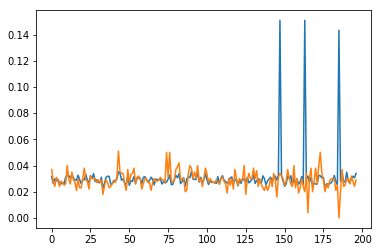

In [27]:
rf = RandomForestRegressor(n_estimators = 600, max_depth = 7, random_state = 12345)
# Train the model on training data
rf.fit(X_train, y_train)

# Use the forest's predict method on the test data
predictions = rf.predict(X_test)
train_predictions = rf.predict(X_train)

print(predictions)
print(y_test.values)

from matplotlib import pyplot

pyplot.plot(predictions)
pyplot.plot(y_test.values)
pyplot.show()

##### Mean Absolute Error

In [28]:
mae = metrics.mean_absolute_error(y_test, predictions)
print("[Test Data] Mean Absolute Error: {0}".format(mae))
print("[Train Data] Mean Absolute Error: {0}".format(metrics.mean_absolute_error(y_train, train_predictions)))

[Test Data] Mean Absolute Error: 0.005620607876732531
[Train Data] Mean Absolute Error: 0.0027843147072089567


##### Mean Squared Error

In [29]:
mse = metrics.mean_squared_error(y_test, predictions)
print("[Test Data] Mean Squared Error: %.5f " % mse)
print("[Train Data] Mean Squared Error: %.5f " % metrics.mean_squared_error(y_train, train_predictions))

[Test Data] Mean Squared Error: 0.00029 
[Train Data] Mean Squared Error: 0.00003 


##### Median Absolute Error

In [30]:
medae = metrics.median_absolute_error(y_test, predictions)
print("[Test Data] Median Absolute Error: {0}".format(medae))
print("[Train Data] Median Absolute Error: {0}".format(metrics.median_absolute_error(y_train, train_predictions)))

[Test Data] Median Absolute Error: 0.0024377394473163484
[Train Data] Median Absolute Error: 0.002142657054550457


##### R2 Score

In [31]:
r2score = metrics.r2_score(y_test, predictions)
print("[Test Data] R2 Score: {0}".format(r2score))
print("[Train Data] R2 Score: {0}".format(metrics.r2_score(y_train, train_predictions)))

[Test Data] R2 Score: -5.9390471853202085
[Train Data] R2 Score: 0.7587357159852636


#### Plot prediction Vs True Values

Text(0,0.5,'Predictions')

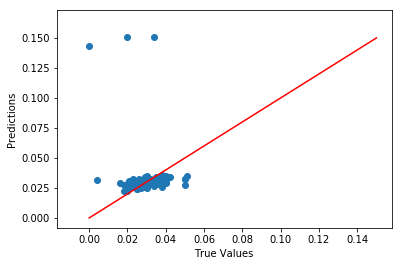

In [32]:
## The line / model
plt.scatter(y_test, predictions)
plt.plot([0.00, 0.05, 0.10, 0.15], [0.00, 0.05, 0.10, 0.15], color="red")
plt.xlabel("True Values")
plt.ylabel("Predictions")

##### Feature Importance

In [33]:
feature_imp = pd.Series(rf.feature_importances_,index=X_train.columns).sort_values(ascending=False)

In [34]:
feature_imp = feature_imp[feature_imp > 0.0100]

In [35]:
feature_imp

input_parameter_169    0.338313
input_parameter_143    0.046678
input_parameter_041    0.020960
input_parameter_126    0.015472
input_parameter_037    0.014546
input_parameter_003    0.014057
input_parameter_142    0.013659
input_parameter_036    0.012652
input_parameter_044    0.012184
input_parameter_075    0.011933
input_parameter_074    0.011843
input_parameter_115    0.010611
input_parameter_047    0.010548
input_parameter_197    0.010361
input_parameter_045    0.010061
dtype: float64

No handles with labels found to put in legend.


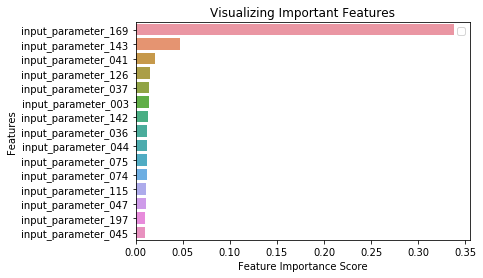

In [36]:
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()